In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
def sample_first_prows(data, perc=0.75):
    return data.head(int(len(data)*(perc)))

### Dataset

In [3]:
# filepath = '/home/hugo/projetos-doutorado/Appliance-Energy-Prediction/data/energydata_complete.csv'
# df = pd.read_csv(filepath, parse_dates=['date'], index_col='date')
# print(df.shape)  # (123, 8)
# df = df.drop(labels=['rv1','rv2'], axis=1)
# df.tail()

filename = '/home/hugo/projetos-doutorado/Appliance-Energy-Prediction/data/HomeC.csv'
df = pd.read_csv(filename,parse_dates=['time'], index_col='time')
# df.pop('House overall [kW]')
# df.pop('cloudCover')
# df.pop('summary')
# df.pop('icon')
df.dropna(inplace=True)
df.head()



/home/hugo/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,,,,,,,,,,,
1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [4]:
df['cloudCover']

time
1451624400    cloudCover
1451624401    cloudCover
1451624402    cloudCover
1451624403    cloudCover
1451624404    cloudCover
                 ...    
1452128305          0.31
1452128306          0.31
1452128307          0.31
1452128308          0.31
1452128309          0.31
Name: cloudCover, Length: 503910, dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503910 entries, 1451624400 to 1452128309
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   use [kW]             503910 non-null  float64
 1   gen [kW]             503910 non-null  float64
 2   House overall [kW]   503910 non-null  float64
 3   Dishwasher [kW]      503910 non-null  float64
 4   Furnace 1 [kW]       503910 non-null  float64
 5   Furnace 2 [kW]       503910 non-null  float64
 6   Home office [kW]     503910 non-null  float64
 7   Fridge [kW]          503910 non-null  float64
 8   Wine cellar [kW]     503910 non-null  float64
 9   Garage door [kW]     503910 non-null  float64
 10  Kitchen 12 [kW]      503910 non-null  float64
 11  Kitchen 14 [kW]      503910 non-null  float64
 12  Kitchen 38 [kW]      503910 non-null  float64
 13  Barn [kW]            503910 non-null  float64
 14  Well [kW]            503910 non-null  float64
 15  Microwave

In [6]:
df['icon'].head()

time
1451624400    clear-night
1451624401    clear-night
1451624402    clear-night
1451624403    clear-night
1451624404    clear-night
Name: icon, dtype: object

In [25]:
#sns.boxplot(x="time", y="temperature", data=df)

<AxesSubplot:>

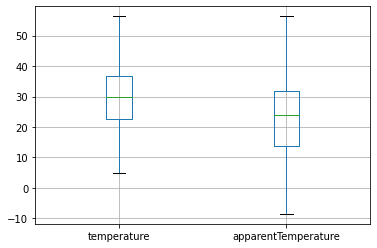

In [21]:
df.boxplot(column=['temperature', 'apparentTemperature'])

<AxesSubplot:>

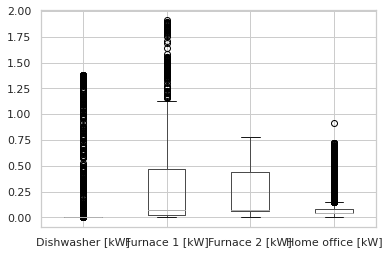

In [30]:
df.boxplot(column=['Dishwasher [kW]','Furnace 1 [kW]','Furnace 2 [kW]','Home office [kW]'])

<AxesSubplot:>

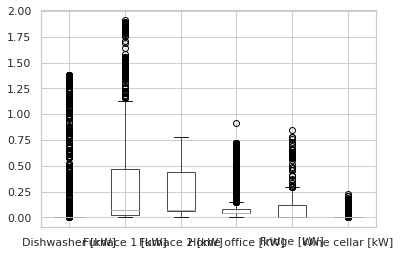

In [28]:
df.boxplot(column=['Dishwasher [kW]','Furnace 1 [kW]','Furnace 2 [kW]','Home office [kW]','Fridge [kW]','Wine cellar [kW]'])

In [4]:
df = sample_first_prows(df, perc=0.1)

In [ ]:
# Plot
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

### Testing Causation using Granger’s Causality Test

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_matrix = grangers_causation_matrix(df, variables = df.columns)     

In [ ]:
grangers_matrix

In [ ]:
f, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(grangers_matrix, cmap='RdYlGn_r', annot=True,linewidths=.5)

### Cointegration Test

<AxesSubplot:>

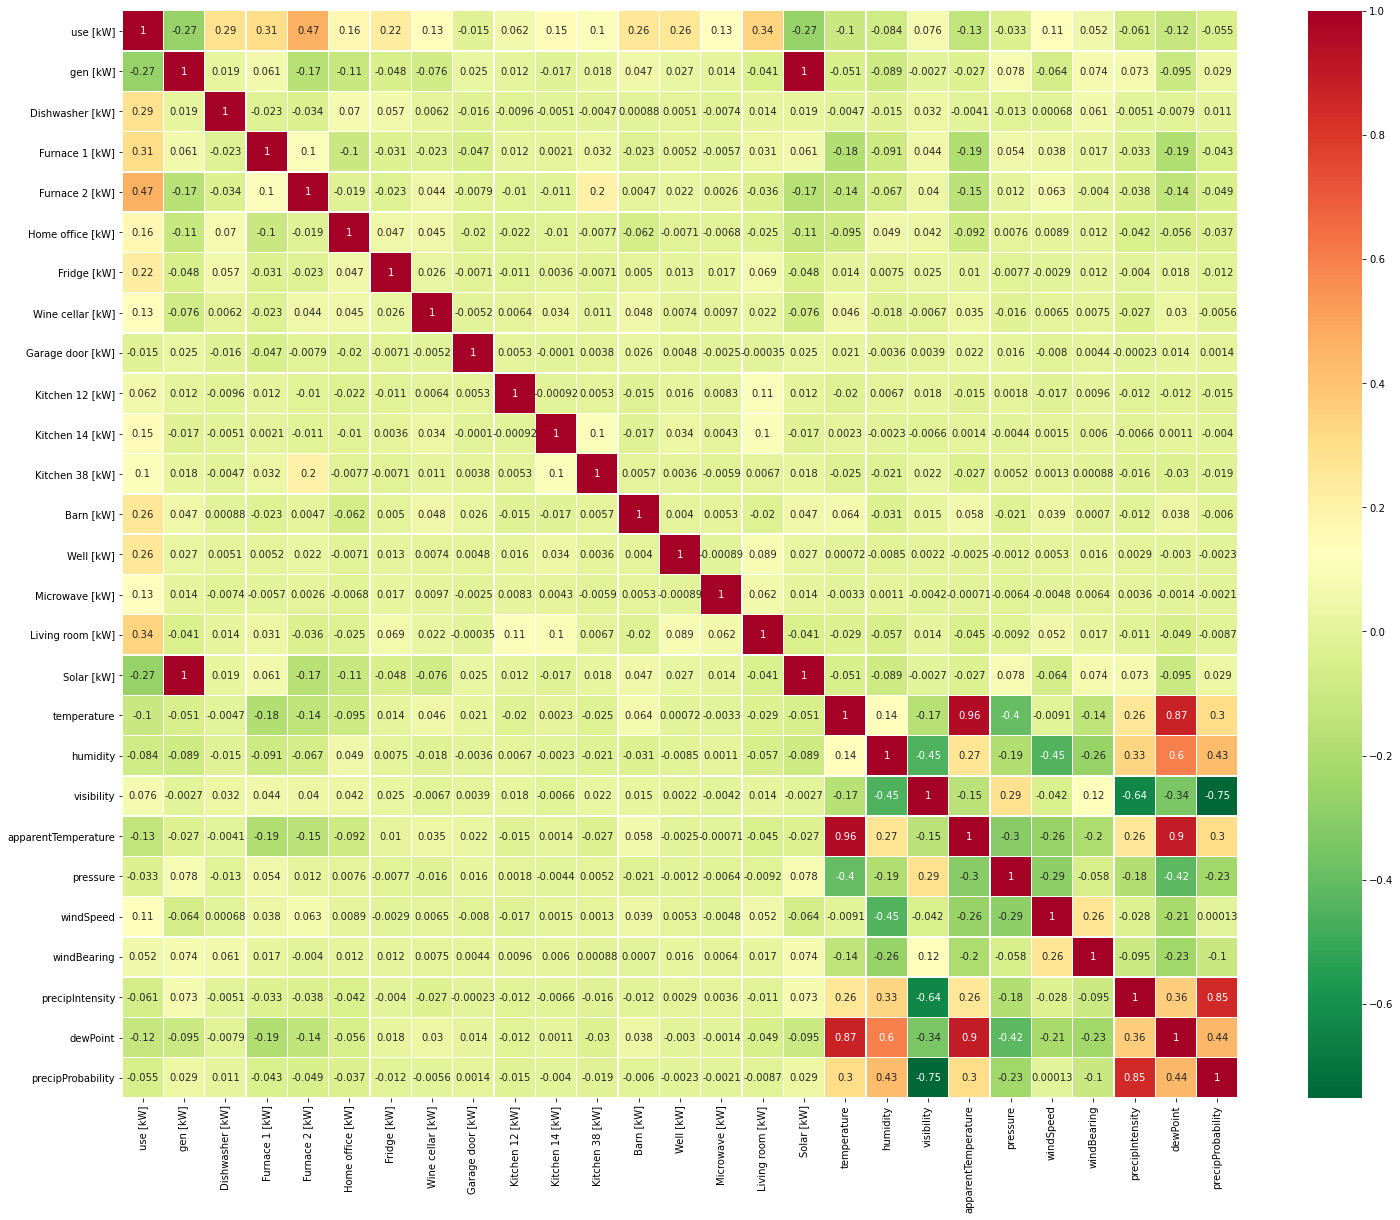

In [5]:
cov_data= df.corr()
f, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(cov_data, cmap='RdYlGn_r', annot=True,linewidths=.5)

In [6]:
cov_data= df.corr()
cov_data

,use [kW],gen [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
use [kW],1.000000,-0.267589,0.285855,0.308841,0.466274,0.162571,0.220958,0.131348,-0.015251,0.062390,...,-0.104155,-0.084494,0.075959,-0.133271,-0.033461,0.112125,0.051998,-0.061074,-0.117122,-0.054953
gen [kW],-0.267589,1.000000,0.019472,0.060818,-0.167205,-0.112050,-0.047629,-0.076024,0.025215,0.012438,...,-0.050965,-0.088947,-0.002661,-0.027220,0.078387,-0.063562,0.074204,0.072986,-0.095285,0.028877
Dishwasher [kW],0.285855,0.019472,1.000000,-0.023121,-0.034389,0.070081,0.056988,0.006234,-0.015797,-0.009589,...,-0.004663,-0.014881,0.032085,-0.004069,-0.012601,0.000678,0.060617,-0.005061,-0.007919,0.010760
Furnace 1 [kW],0.308841,0.060818,-0.023121,1.000000,0.104213,-0.104669,-0.030901,-0.022893,-0.047042,0.011538,...,-0.179868,-0.090691,0.044105,-0.187889,0.053925,0.037902,0.017455,-0.033187,-0.187580,-0.043249
Furnace 2 [kW],0.466274,-0.167205,-0.034389,0.104213,1.000000,-0.019392,-0.022660,0.044068,-0.007907,-0.009980,...,-0.138110,-0.066519,0.040401,-0.153925,0.012451,0.063214,-0.004004,-0.038176,-0.140438,-0.048876
Home office [kW],0.162571,-0.112050,0.070081,-0.104669,-0.019392,1.000000,0.047331,0.044542,-0.020353,-0.022311,...,-0.094652,0.049338,0.041602,-0.092314,0.007633,0.008927,0.011863,-0.042202,-0.056317,-0.037007
Fridge [kW],0.220958,-0.047629,0.056988,-0.030901,-0.022660,0.047331,1.000000,0.025619,-0.007091,-0.011465,...,0.013918,0.007546,0.024904,0.010237,-0.007696,-0.002947,0.012494,-0.004041,0.018265,-0.012148
Wine cellar [kW],0.131348,-0.076024,0.006234,-0.022893,0.044068,0.044542,0.025619,1.000000,-0.005233,0.006412,...,0.045564,-0.018424,-0.006693,0.035147,-0.015858,0.006467,0.007487,-0.027003,0.030495,-0.005567
Garage door [kW],-0.015251,0.025215,-0.015797,-0.047042,-0.007907,-0.020353,-0.007091,-0.005233,1.000000,0.005346,...,0.020710,-0.003577,0.003865,0.022442,0.015746,-0.008010,0.004373,-0.000230,0.014376,0.001441
Kitchen 12 [kW],0.062390,0.012438,-0.009589,0.011538,-0.009980,-0.022311,-0.011465,0.006412,0.005346,1.000000,...,-0.019524,0.006672,0.017848,-0.014959,0.001776,-0.016597,0.009563,-0.011694,-0.011783,-0.015425


In [ ]:
# from statsmodels.tsa.vector_ar.vecm import coint_johansen

# def cointegration_test(df, alpha=0.05): 
#     """Perform Johanson's Cointegration Test and Report Summary"""
#     out = coint_johansen(df,-1,5)
#     d = {'0.90':0, '0.95':1, '0.99':2}
#     traces = out.lr1
#     cvts = out.cvt[:, d[str(1-alpha)]]
#     def adjust(val, length= 6): return str(val).ljust(length)

#     # Summary
#     print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
#     for col, trace, cvt in zip(df.columns, traces, cvts):
#         print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

# cointegration_test(df)

In [7]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [8]:
# ADF Test on each column
for name, column in df.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "use [kW]" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -14.7933
 No. Lags Chosen       = 56
 Critical value 1%     = -3.43
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "gen [kW]" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.3625
 No. Lags Chosen       = 57
 Critical value 1%     = -3.43
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Dishwasher [kW]" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significa

    Augmented Dickey-Fuller Test on "apparentTemperature" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.8283
 No. Lags Chosen       = 0
 Critical value 1%     = -3.43
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0543. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "pressure" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.8826
 No. Lags Chosen       = 0
 Critical value 1%     = -3.43
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.7937. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "windSpeed" 
    -----------------------------------------------
 Null Hypoth

In [9]:
df_differenced = df.diff().dropna()
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "use [kW]" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -42.4723
 No. Lags Chosen       = 57
 Critical value 1%     = -3.43
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "gen [kW]" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -30.07
 No. Lags Chosen       = 56
 Critical value 1%     = -3.43
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Dishwasher [kW]" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significan

    Augmented Dickey-Fuller Test on "apparentTemperature" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -23.9871
 No. Lags Chosen       = 57
 Critical value 1%     = -3.43
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "pressure" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.6548
 No. Lags Chosen       = 57
 Critical value 1%     = -3.43
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "windSpeed" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Sign

### KPSS test

In [11]:
# regression='ct'
# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, name='', **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Test on "{name}"', "\n   ", '-'*47)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')


In [12]:
for name, column in df.iteritems():
    kpss_test(column, name=column.name)
    print('\n')

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2041: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2072: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  war

KPSS Test on "use [kW]" 
    -----------------------------------------------
KPSS Statistic: 2.7570701880565087
p-value: 0.01
num lags: 57
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


KPSS Test on "gen [kW]" 
    -----------------------------------------------
KPSS Statistic: 0.20246422202547829
p-value: 0.1
num lags: 57
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "Dishwasher [kW]" 
    -----------------------------------------------
KPSS Statistic: 0.07320730127744657
p-value: 0.1
num lags: 57
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "Furnace 1 [kW]" 
    -----------------------------------------------
KPSS Statistic: 3.739098196644741
p-value: 0.01
num lags: 57
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is n

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2072: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2072: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2072: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2072: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The

In [13]:
df_differenced = df.diff().dropna()
for name, column in df_differenced.iteritems():
    kpss_test(column, name=column.name)
    print('\n')

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2041: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  war

KPSS Test on "use [kW]" 
    -----------------------------------------------
KPSS Statistic: 0.0008673666321633277
p-value: 0.1
num lags: 57
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "gen [kW]" 
    -----------------------------------------------
KPSS Statistic: 0.0035608719584862237
p-value: 0.1
num lags: 57
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "Dishwasher [kW]" 
    -----------------------------------------------
KPSS Statistic: 0.0008257897438391741
p-value: 0.1
num lags: 57
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "Furnace 1 [kW]" 
    -----------------------------------------------
KPSS Statistic: 0.0008453456828385534
p-value: 0.1
num lags: 57
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The

<AxesSubplot:>

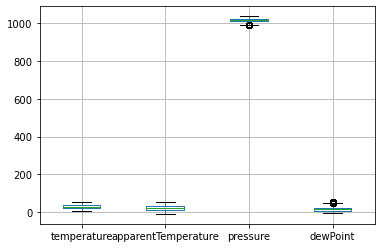

In [20]:
df.boxplot(column=['temperature', 'apparentTemperature', 'pressure','dewPoint'])

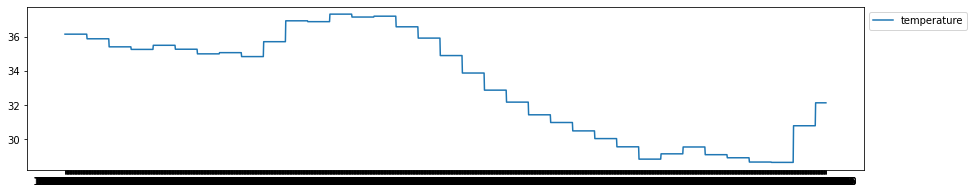

In [19]:
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15, 3])
# ax.plot(df['temperature'][0:2000], label='temperature')
# #ax.plot(df['apparentTemperature'][0:100], label='apparentTemperature') 
# # ax.plot(df['pressure'][0:100], label='pressure')
# # ax.plot(df['dewPoint'][0:100], label='dewPoint')
# handles, labels = ax.get_legend_handles_labels()
# lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))
# plt.show()